# Cab Investment Analysis



In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
path = "C:/Users/JOAO/Documents/Data Glacier/DataGlacier/Week2/DataSets/"
os.chdir(path)
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [264]:
cab_data = pd.read_csv('Cab_Data.csv')
city = pd.read_csv('City.csv')
customer = pd.read_csv('Customer_ID.csv')
transaction = pd.read_csv('Transaction_ID.csv')

dfs = {}
dfs['Cab_Data'] = cab_data
dfs['City'] = city
dfs['Customer'] = customer
dfs['Transaction'] = transaction

In [265]:
cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [266]:
city

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [267]:
customer

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [268]:
transaction

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [269]:
cab_data.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


In [270]:
customer.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [271]:
for key, df in dfs.items():
    print('*****{}*****\n{}\n'.format(key, df.dtypes))

*****Cab_Data*****
Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

*****City*****
City          object
Population    object
Users         object
dtype: object

*****Customer*****
Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

*****Transaction*****
Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object



In [272]:
def convert_date(row):
    start = dt.datetime(1899, 12, 31)
    ordinal = row['Date of Travel']
    if ordinal >= 60:
        ordinal -= 1  # Excel leap year bug, 1900 is not a leap year!
    return (start + dt.timedelta(days=ordinal)).replace(microsecond=0).date()

In [273]:
cab_data['Date of Travel'] = cab_data.apply(convert_date, axis = 1)
cab_data['Profit'] = cab_data['Price Charged'] - cab_data['Cost of Trip']
cab_data['Margin'] =  cab_data['Profit']/cab_data['Price Charged']
cab_data.sort_values(by = 'Profit', ascending = False)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Margin
138644,10170615,2017-05-05,Yellow Cab,NEW YORK NY,46.80,2048.03,584.0640,1463.9660,0.714817
138669,10170640,2017-05-05,Yellow Cab,NEW YORK NY,43.29,2016.70,571.4280,1445.2720,0.716652
138766,10170737,2017-04-30,Yellow Cab,NEW YORK NY,43.20,2013.95,580.6080,1433.3420,0.711707
138548,10170519,2017-04-30,Yellow Cab,NEW YORK NY,41.81,1981.05,556.9092,1424.1408,0.718882
138732,10170703,2017-04-30,Yellow Cab,NEW YORK NY,41.65,1918.14,509.7960,1408.3440,0.734224
...,...,...,...,...,...,...,...,...,...
115200,10141320,2017-01-30,Pink Cab,DALLAS TX,48.00,354.36,518.4000,-164.0400,-0.462919
23384,10029696,2016-05-04,Pink Cab,DALLAS TX,43.29,328.85,497.8350,-168.9850,-0.513867
54991,10069188,2016-08-28,Yellow Cab,TUCSON AZ,44.07,415.37,592.3008,-176.9308,-0.425960
18954,10024048,2016-04-13,Pink Cab,DALLAS TX,42.56,303.51,502.2080,-198.6980,-0.654667


In [259]:
def print_null(df):
    for col in df.columns:
        print('{} - {}'.format(col, df[df[col].isnull()].shape[0]))

for key, df in dfs.items():
    print('\n*****{}***** --> {} rows'.format(key, df.shape[0]))
    print_null(df)


*****Cab_Data***** --> 359392 rows
Transaction ID - 0
Date of Travel - 0
Company - 0
City - 0
KM Travelled - 0
Price Charged - 0
Cost of Trip - 0
Profit - 0
Margin - 0

*****City***** --> 20 rows
City - 0
Population - 0
Users - 0
Users/100k - 0

*****Customer***** --> 49171 rows
Customer ID - 0
Gender - 0
Age - 0
Income (USD/Month) - 0

*****Transaction***** --> 440098 rows
Transaction ID - 0
Customer ID - 0
Payment_Mode - 0


In [260]:
city.replace(',','', regex=True, inplace = True)
city['Population'] = city['Population'].astype(int)
city['Users'] = city['Users'].astype(int)
city.dtypes

City           object
Population      int32
Users           int32
Users/100k    float64
dtype: object

In [261]:
city['Users/100k'] = city.Users / city.Population * 100000
city.sort_values(by = 'Users/100k', ascending = False)

,City,Population,Users,Users/100k
14,SAN FRANCISCO CA,629591,213609,33928.216890
19,BOSTON MA,248968,80021,32141.078372
17,WASHINGTON DC,418859,127001,30320.704581
2,LOS ANGELES CA,1595037,144132,9036.279409
1,CHICAGO IL,1955130,164468,8412.126048
6,SAN DIEGO CA,959307,69995,7296.412931
12,SEATTLE WA,671238,25063,3733.847011
0,NEW YORK NY,8405837,302149,3594.514145
9,ATLANTA GA,814885,24701,3031.225265
18,NASHVILLE TN,327225,9270,2832.913133


In [253]:
holidays = pd.read_csv('USHoliday.csv')
holidays['Date'] = pd.to_datetime(holidays['Date'])
holidays = holidays[holidays.Year.between(2016, 2018)][['Date', 'Holiday', 'WeekDay']]
holidays.head()

,Date,Holiday,WeekDay
12,2016-07-04,4th of July,Monday
13,2017-07-04,4th of July,Tuesday
14,2018-07-04,4th of July,Wednesday
30,2016-12-25,Christmas Day,Sunday
31,2017-12-25,Christmas Day,Monday


In [255]:
data = cab_data.merge(transaction, how = 'left', on = 'Transaction ID')
data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Customer ID,Payment_Mode
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,29290,Card
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,27703,Card
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680,28712,Cash
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980,28020,Cash
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440,27182,Card
...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800,52392,Cash
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020,53286,Cash
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200,52265,Cash
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420,52175,Card


In [256]:
print(data.columns)
print(city.columns)
print(customer.columns)
print(holidays.columns)

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Profit', 'Customer ID',
       'Payment_Mode'],
      dtype='object')
Index(['City', 'Population', 'Users', 'Users/100k'], dtype='object')
Index(['Customer ID', 'Gender', 'Age', 'Income (USD/Month)'], dtype='object')
Index(['Date', 'Holiday', 'WeekDay'], dtype='object')


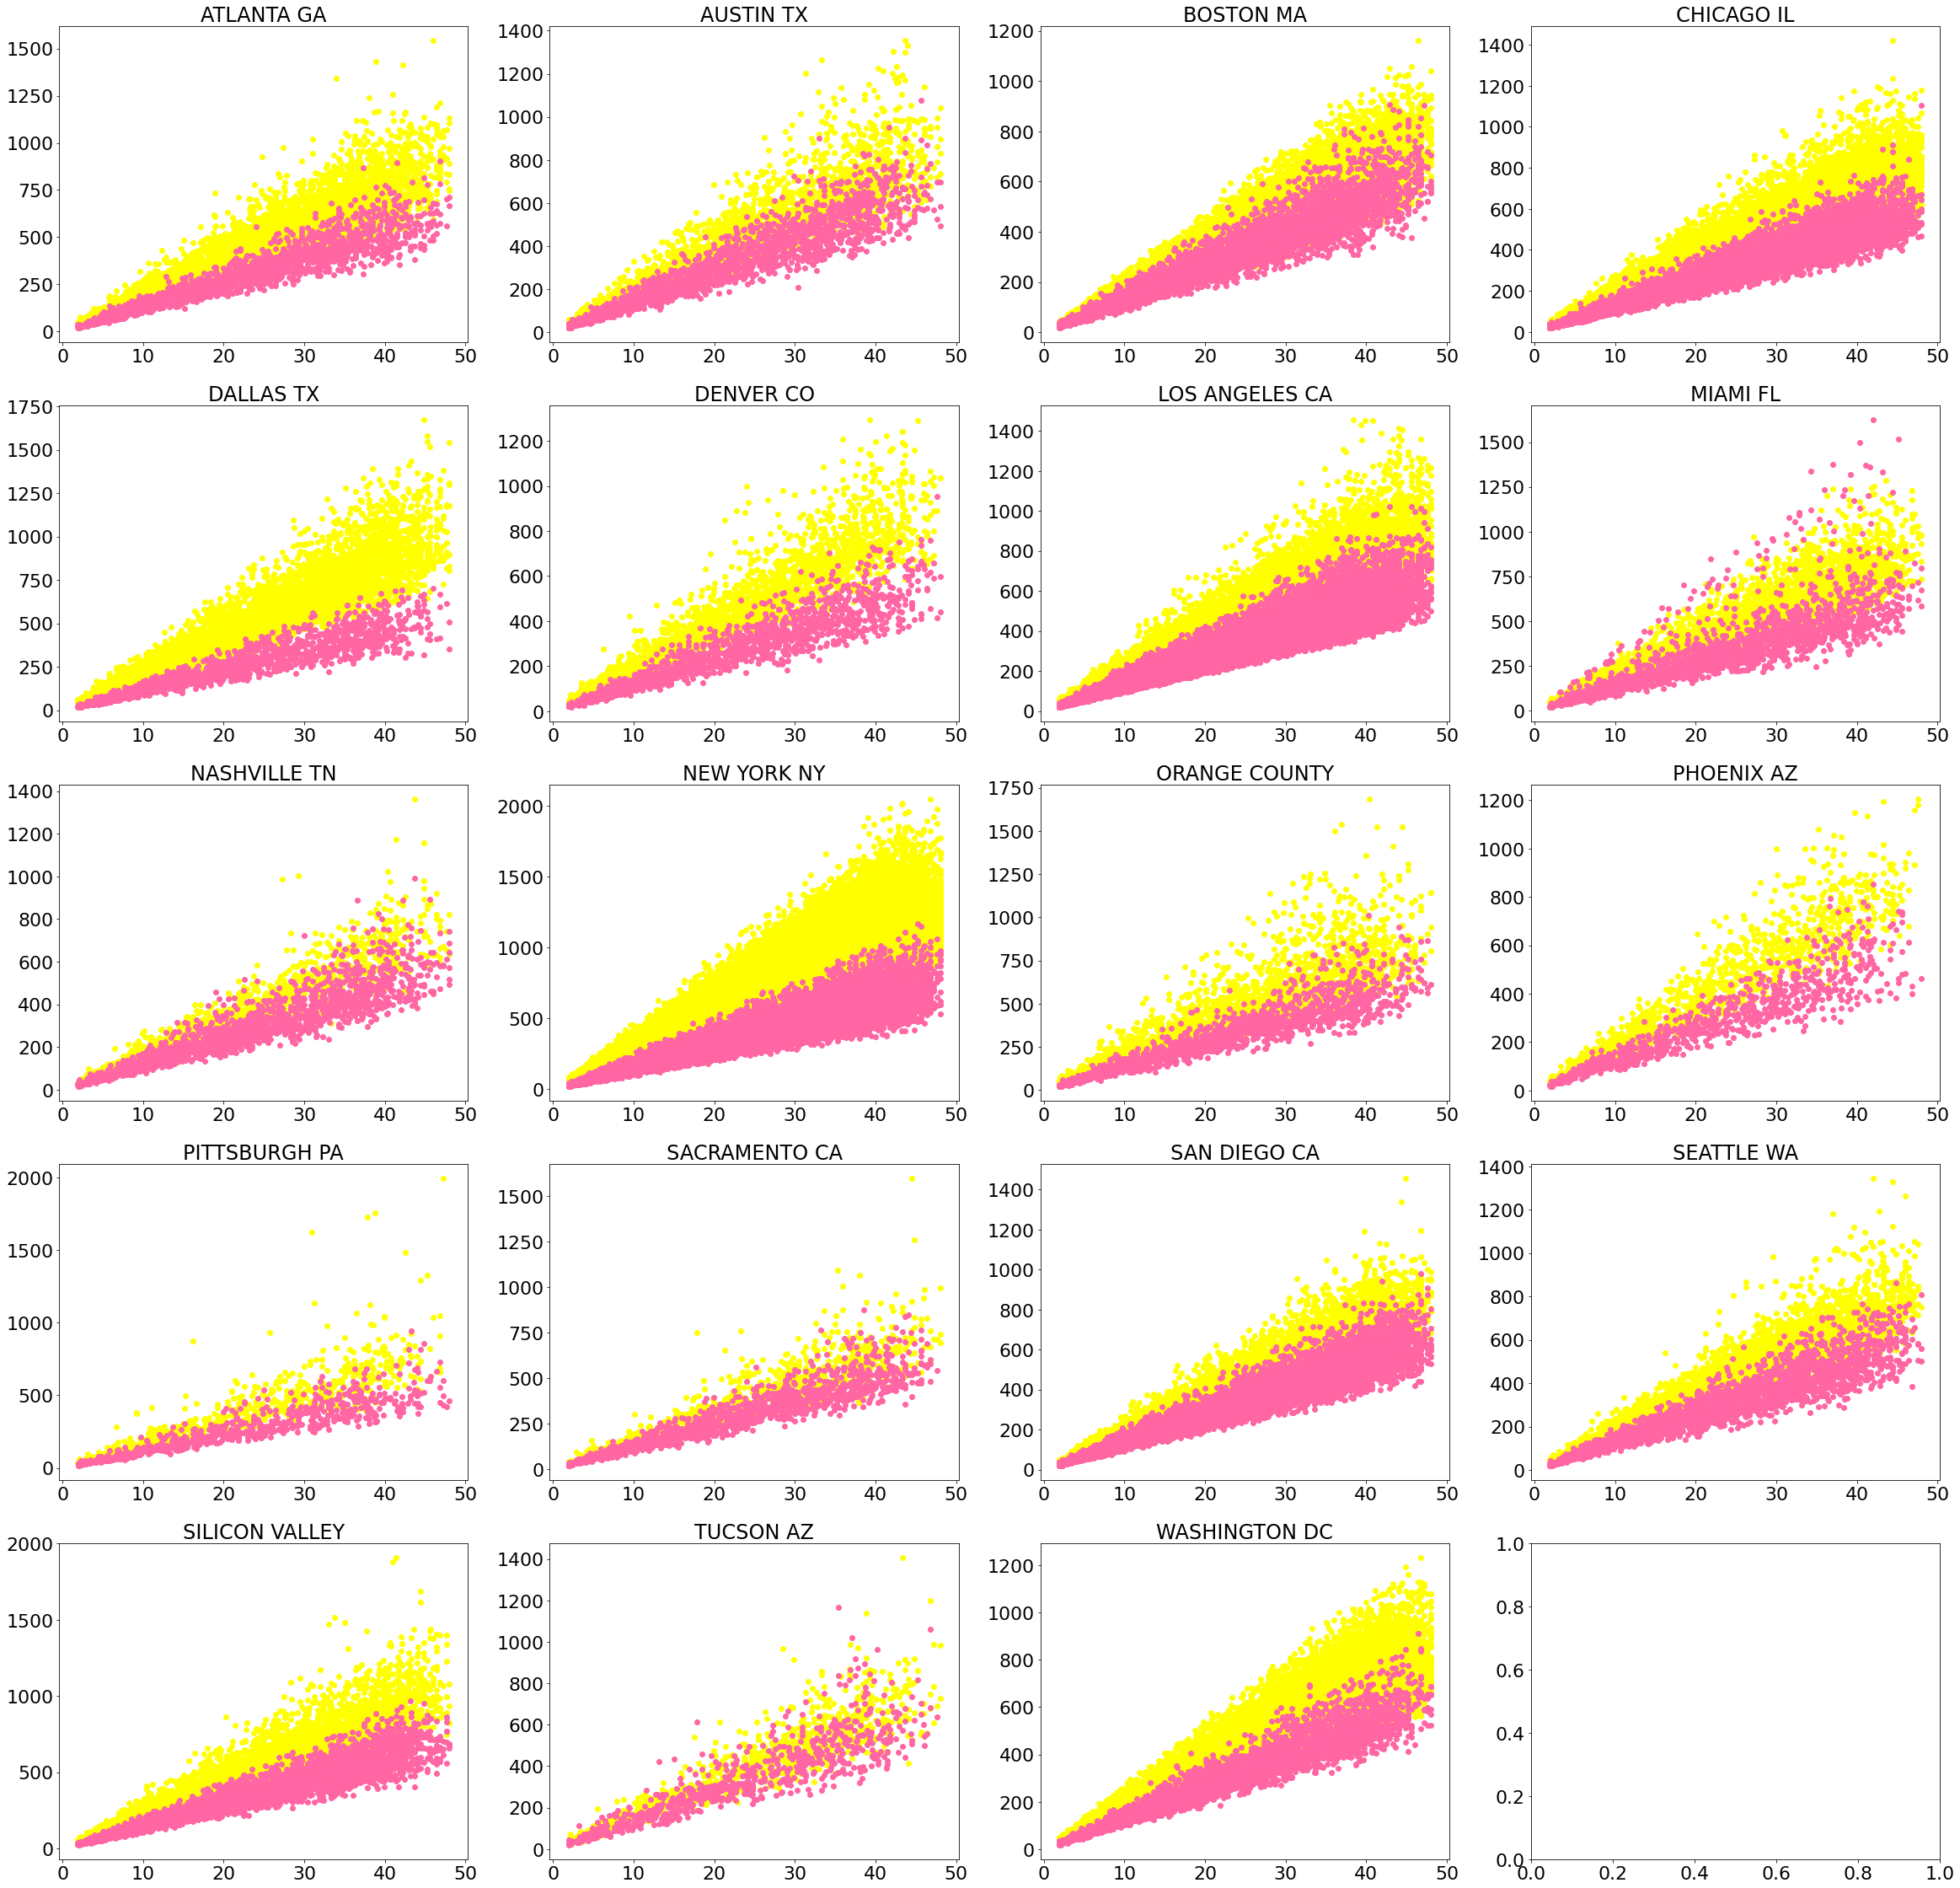

In [234]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(5, 4)
plt.rcParams["figure.figsize"] = (40,40)
plt.rcParams['font.size'] = 22

for i, el in enumerate(data.City.unique()):
    x = data[data.City == el]
    yellow = x[x.Company == 'Yellow Cab']
    pink = x[x.Company == 'Pink Cab']
    axis[i//4, i%4].scatter(yellow['KM Travelled'], yellow['Price Charged'], color = 'yellow')
    axis[i//4, i%4].scatter(pink['KM Travelled'], pink['Price Charged'], color = '#ff66a3')
    axis[i//4, i%4].set_title(el, fontsize = 24)
# Combine all the operations and display
plt.show()

In [181]:
data['Profit'] = data['Price Charged'] - data['Cost of Trip']

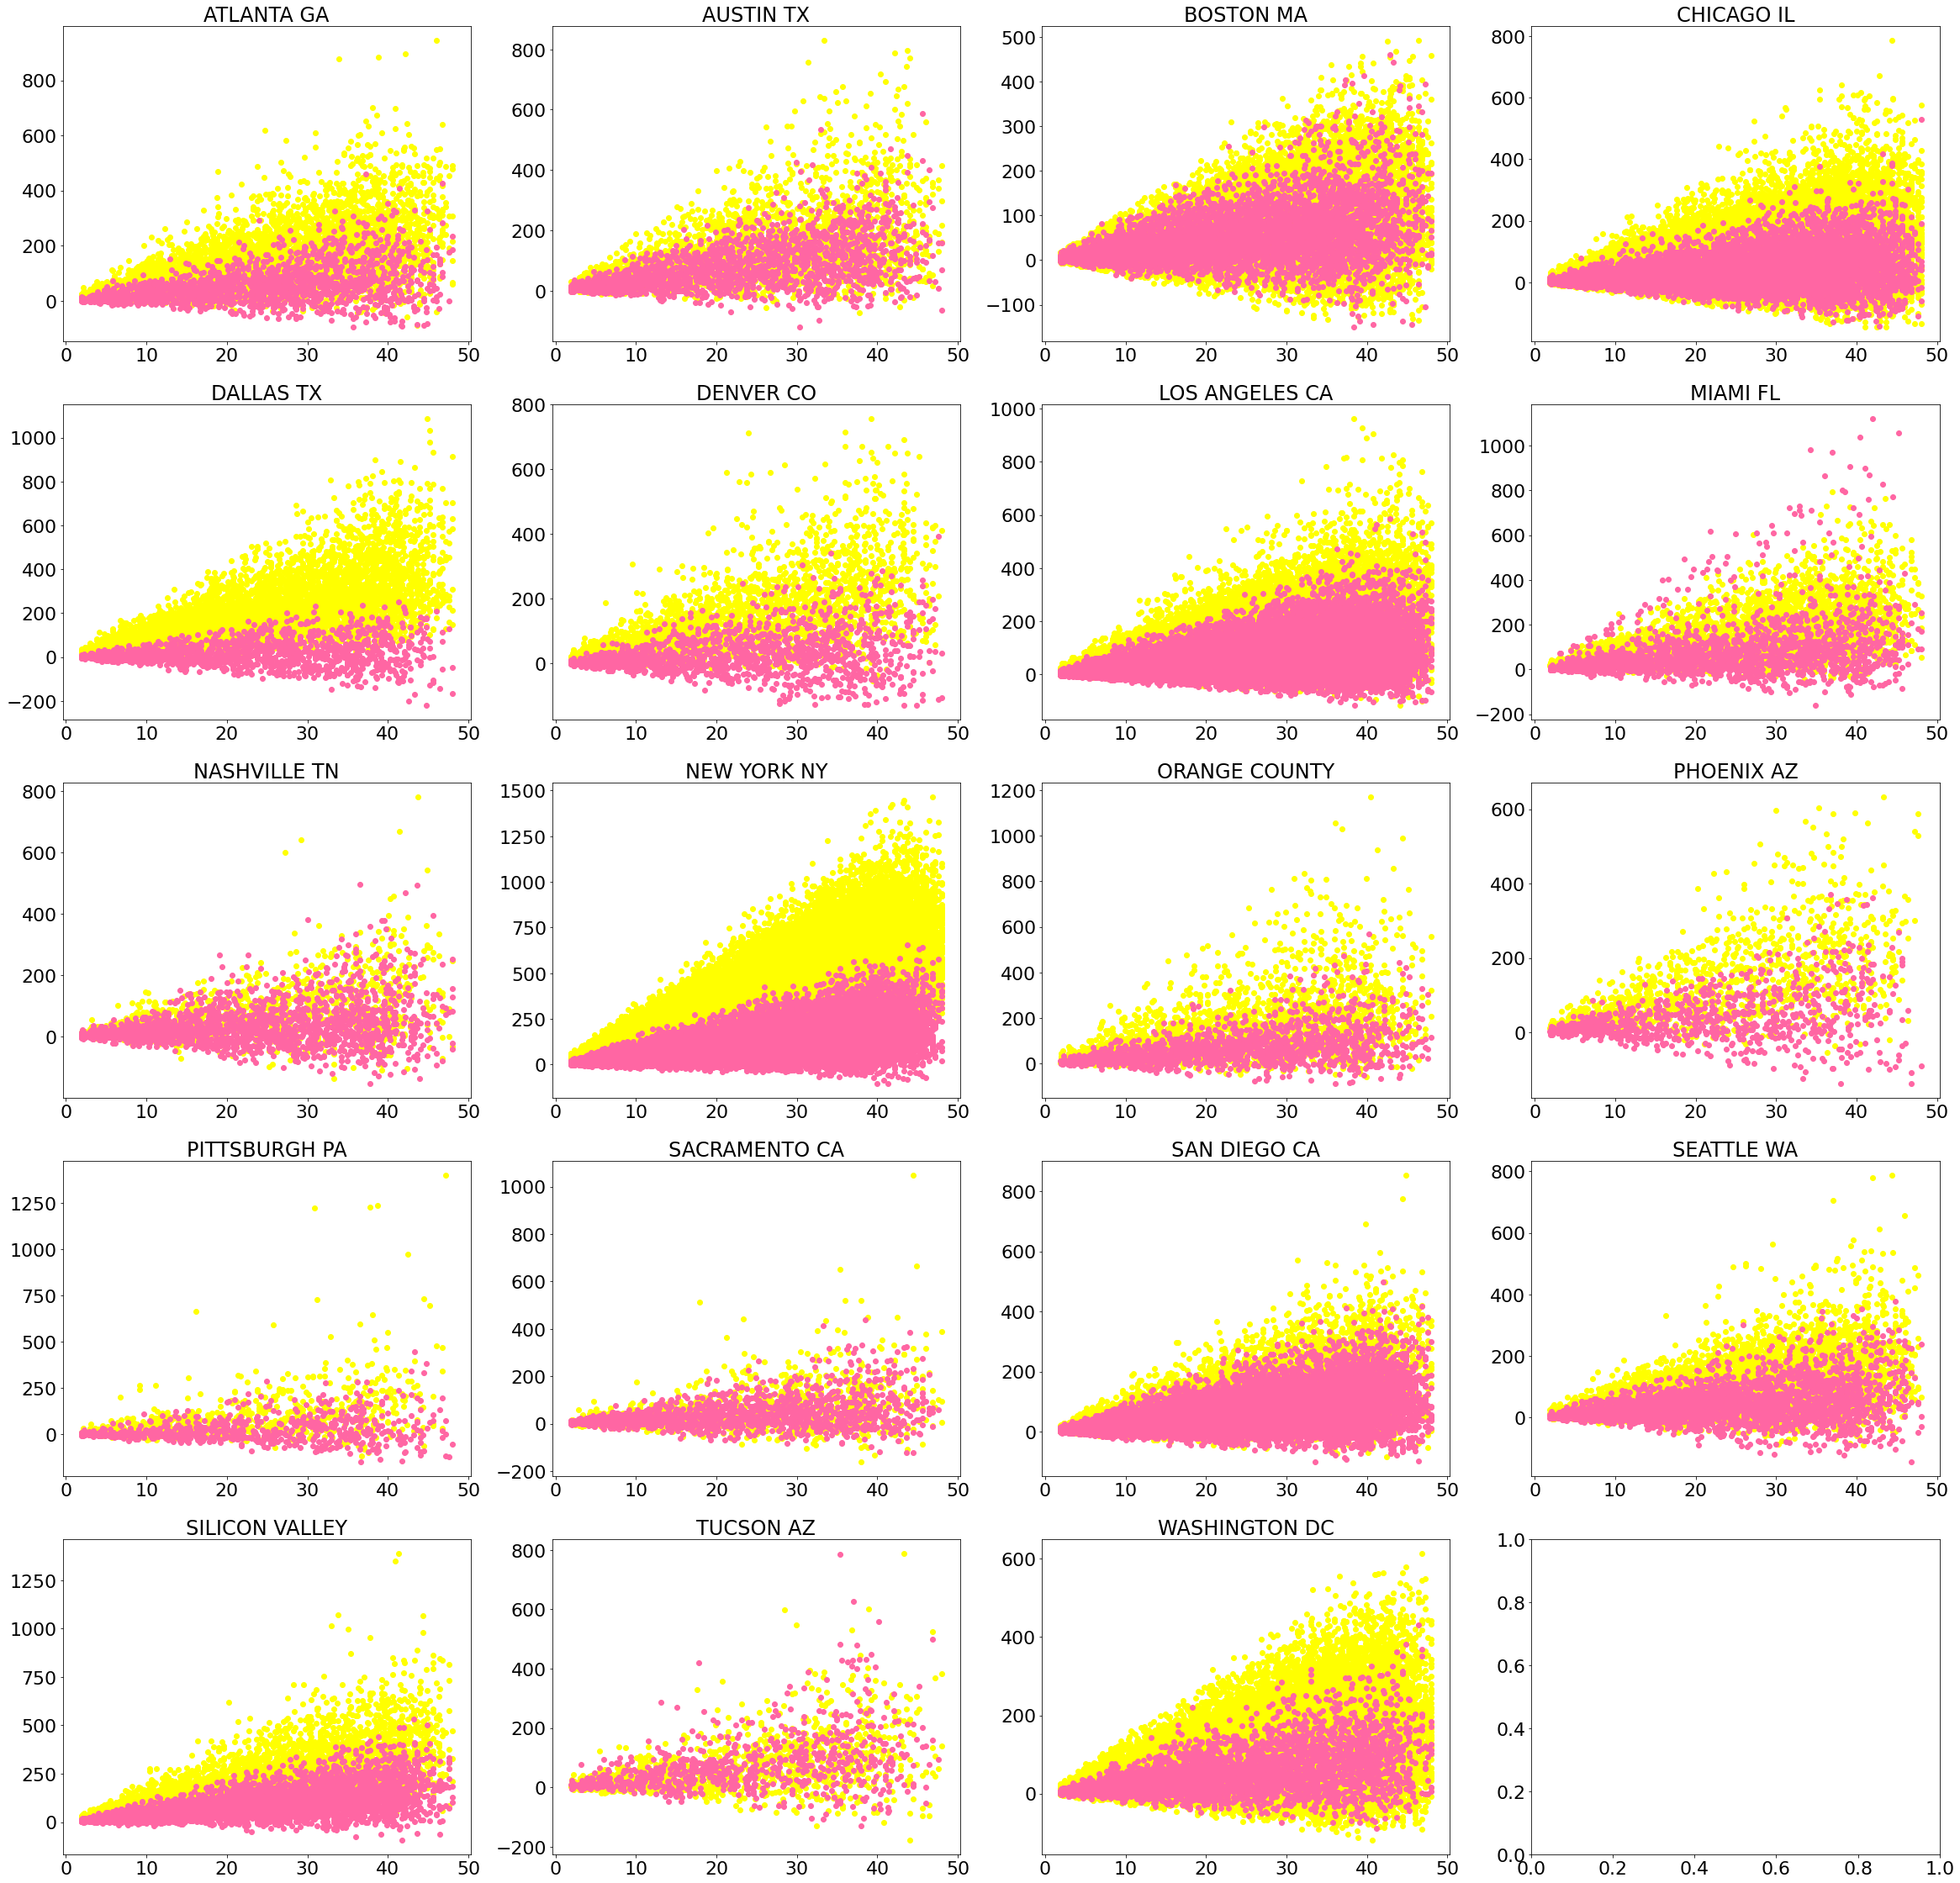

In [232]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(5, 4)
plt.rcParams["figure.figsize"] = (40,40)
plt.rcParams['font.size'] = 22

for i, el in enumerate(data.City.unique()):
    x = data[data.City == el]
    yellow = x[x.Company == 'Yellow Cab']
    pink = x[x.Company == 'Pink Cab']
    axis[i//4, i%4].scatter(yellow['KM Travelled'], yellow['Profit'], color = 'yellow')
    axis[i//4, i%4].scatter(pink['KM Travelled'], pink['Profit'], color = '#ff66a3')
    axis[i//4, i%4].set_title(el, fontsize = 24)
# Combine all the operations and display
plt.show()

In [162]:
data.City.unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

In [201]:
total = 0
yellow = 0

for el in data.City.unique():
    sr = data[data.City == el].Profit
    std = sr.std()
    mean = sr.mean()
    outliers = sr.loc[(sr > mean + 3*std)]
    x = data.loc[outliers.index].Company.value_counts()
    total += outliers.size
    yellow += x.loc['Yellow Cab']
    #data.drop(outliers.index, inplace = True)
    print('{}: {} "outliers" - {:.1f}% Yellow Cab'.format(el, outliers.size, x.loc['Yellow Cab']/x.sum()*100))
    
print('\n{} of the {} "outliers" are from Yellow Cab company ==> {:.1f}%'.format(yellow, total, yellow/total*100))

ATLANTA GA: 119 "outliers" - 99.2% Yellow Cab
AUSTIN TX: 79 "outliers" - 94.9% Yellow Cab
BOSTON MA: 422 "outliers" - 87.0% Yellow Cab
CHICAGO IL: 926 "outliers" - 98.2% Yellow Cab
DALLAS TX: 98 "outliers" - 100.0% Yellow Cab
DENVER CO: 59 "outliers" - 100.0% Yellow Cab
LOS ANGELES CA: 762 "outliers" - 96.1% Yellow Cab
MIAMI FL: 108 "outliers" - 59.3% Yellow Cab
NASHVILLE TN: 43 "outliers" - 67.4% Yellow Cab
NEW YORK NY: 816 "outliers" - 100.0% Yellow Cab
ORANGE COUNTY: 81 "outliers" - 98.8% Yellow Cab
PHOENIX AZ: 35 "outliers" - 100.0% Yellow Cab
PITTSBURGH PA: 20 "outliers" - 95.0% Yellow Cab
SACRAMENTO CA: 44 "outliers" - 70.5% Yellow Cab
SAN DIEGO CA: 326 "outliers" - 88.7% Yellow Cab
SEATTLE WA: 116 "outliers" - 96.6% Yellow Cab
SILICON VALLEY: 133 "outliers" - 100.0% Yellow Cab
TUCSON AZ: 36 "outliers" - 47.2% Yellow Cab
WASHINGTON DC: 705 "outliers" - 99.1% Yellow Cab

4682 of the 4928 "outliers" are from Yellow Cab company ==> 95.0%


In [222]:
d_stats = {'Profit': ['count','sum', 'mean'], 'KM Travelled': ['sum', 'mean']}
col_names = ['Rides', 'Total Profit', 'Average Profit', 'Total Distance', 'Average Distance']
g_profit = data.groupby(by = [pd.DatetimeIndex(x['Date of Travel']).year, 'Company']).agg(d_stats)
g_profit.columns = col_names
g_profit

Rides  Total Profit  Average Profit  \
Date of Travel Company                                           
2016           Pink Cab    25080  1.713511e+06       68.321819   
               Yellow Cab  82239  1.392700e+07      169.347821   
2017           Pink Cab    30321  2.033655e+06       67.070839   
               Yellow Cab  98189  1.657598e+07      168.817057   
2018           Pink Cab    29310  1.560162e+06       53.229689   
               Yellow Cab  94253  1.351740e+07      143.416122   

                           Total Distance  Average Distance  
Date of Travel Company                                       
2016           Pink Cab         563509.67         22.468488  
               Yellow Cab      1859978.21         22.616742  
2017           Pink Cab         685823.52         22.618763  
               Yellow Cab      2214879.02         22.557303  
2018           Pink Cab         661739.92         22.577275  
               Yellow Cab      2124560.24         22.541036

In [224]:
g_profit.Rides

Date of Travel  Company   
2016            Pink Cab      25080
                Yellow Cab    82239
2017            Pink Cab      30321
                Yellow Cab    98189
2018            Pink Cab      29310
                Yellow Cab    94253
Name: Rides, dtype: int64

In [208]:
x = data.set_index('Date of Travel')
x

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Customer ID,Payment_Mode
Date of Travel,,,,,,,,,
2016-01-08,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,29290,Card
2016-01-06,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,27703,Card
2016-01-02,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680,28712,Cash
2016-01-07,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980,28020,Cash
2016-01-03,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440,27182,Card
...,...,...,...,...,...,...,...,...,...
2018-01-08,10440101,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800,52392,Cash
2018-01-04,10440104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020,53286,Cash
2018-01-05,10440105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200,52265,Cash


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Customer ID,Payment_Mode,year
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,29290,Card,2016
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,27703,Card,2016
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680,28712,Cash,2016
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980,28020,Cash,2016
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440,27182,Card,2016
...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800,52392,Cash,2018
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020,53286,Cash,2018
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200,52265,Cash,2018
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420,52175,Card,2018
